In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### 1. Write a Python program to train an SVM Classifier on the Iris dataset and evaluate accuracy

In [2]:
from sklearn.datasets import load_iris
data = load_iris()
data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [3]:
x = data.data
y = data.target

In [4]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size  = 0.20,random_state = 1)

In [5]:
from sklearn.svm import SVC
clf = SVC()
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)

#model Evalution
from sklearn.metrics import accuracy_score,classification_report
print("Classification_report :")
print(classification_report(y_test,y_pred))
print("accuracy_score:")
print(accuracy_score(y_test,y_pred))


Classification_report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30

accuracy_score:
0.9666666666666667


### 3. Write a Python program to train two SVM classifiers with Linear and RBF kernels on the Wine dataset, then compare their accuracies:

In [6]:
#model Evalution linear
clf = SVC(kernel = "linear")
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)

from sklearn.metrics import accuracy_score,classification_report
print("Classification_report :")
print(classification_report(y_test,y_pred))
print("accuracy_score:")
print(accuracy_score(y_test,y_pred))

print("model evalution where the kernel is rbs")



Classification_report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

accuracy_score:
1.0
model evalution where the kernel is rbs


In [7]:

clf = SVC(kernel = "rbf")
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)

from sklearn.metrics import accuracy_score,classification_report
print("Classification_report :")
print(classification_report(y_test,y_pred))
print("accuracy_score:")
print(accuracy_score(y_test,y_pred))

Classification_report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30

accuracy_score:
0.9666666666666667


### 3. Write a Python program to train an SVM Regressor (SVR) on a housing dataset and evaluate it using Mean Squared Error (MSE):


In [8]:

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

In [9]:
# Step 1: Load the California Housing Dataset
data = fetch_california_housing()
X = data.data  # Features
y = data.target  # Target variable (house price)

In [10]:

# Step 2: Split the Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Standardize the Features (SVR is sensitive to feature scaling)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [11]:
svr = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)  # RBF Kernel for non-linearity
svr.fit(X_train_scaled, y_train)
# Step 5: Make Predictions
y_pred = svr.predict(X_test_scaled)

# Step 6: Evaluate Using Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.4f}")


Mean Squared Error (MSE): 0.3245


### 4. Write a Python program to train an SVM Classifier with a Polynomial Kernel and visualize the decision boundary:

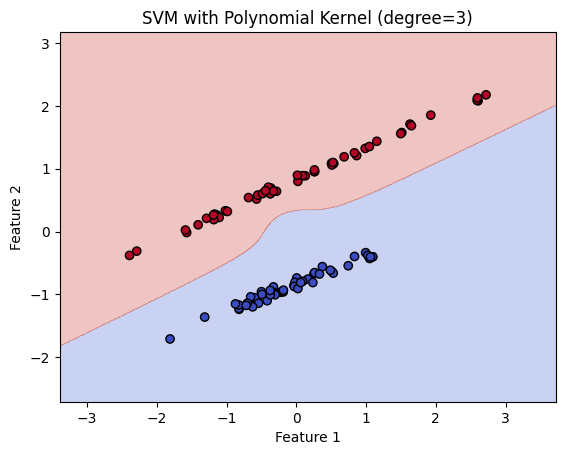

In [12]:
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Generate a synthetic dataset
X, y = make_classification(
    n_samples=100,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_clusters_per_class=1,
    class_sep=1.2,
    random_state=42
)

# Standardize the dataset
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train an SVM classifier with a polynomial kernel
svm = SVC(kernel='poly', degree=3, C=1.0, gamma='scale', random_state=42)
svm.fit(X_train, y_train)

# Visualize the decision boundary
def plot_decision_boundary(X, y, model):
    # Create a mesh grid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

    # Predict on the mesh grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=plt.cm.coolwarm)
    plt.title('SVM with Polynomial Kernel (degree=3)')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

# Call the function to plot
plot_decision_boundary(X, y, svm)


### 5.  Write a Python program to train a Gaussian Naïve Bayes classifier on the Breast Cancer dataset and evaluate accuracy:

In [13]:

from sklearn.datasets import load_breast_cancer
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

data = load_breast_cancer()
X = data.data  # Features
y = data.target  # Target (0 = Malignant, 1 = Benign)

# Step 2: Split the Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train a Gaussian Naïve Bayes Model
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Step 4: Make Predictions
y_pred = gnb.predict(X_test)

# Step 5: Evaluate Model Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Gaussian Naïve Bayes Classifier: {accuracy:.4f}")


Accuracy of Gaussian Naïve Bayes Classifier: 0.9737


### 6. Write a Python program to train a Multinomial Naïve Bayes classifier for text classification using the 20 Newsgroups dataset

In [14]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Load the 20 Newsgroups dataset
categories = ['sci.space', 'comp.graphics', 'rec.sport.baseball', 'talk.politics.mideast']
newsgroups = fetch_20newsgroups(subset='all', categories=categories, remove=('headers', 'footers', 'quotes'), random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(newsgroups.data, newsgroups.target, test_size=0.3, random_state=42)

# Vectorize the text data
vectorizer = CountVectorizer(stop_words='english', max_features=100)
X_train_counts = vectorizer.fit_transform(X_train)
X_test_counts = vectorizer.transform(X_test)

# Transform counts to TF-IDF representation
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_test_tfidf = tfidf_transformer.transform(X_test_counts)

# Train a Multinomial Naïve Bayes classifier
classifier = MultinomialNB()
classifier.fit(X_train_tfidf, y_train)

# Make predictions on the test set
y_pred = classifier.predict(X_test_tfidf)

# Evaluate the classifier
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=newsgroups.target_names))

print("Accuracy:", accuracy_score(y_test, y_pred))


Classification Report:
                       precision    recall  f1-score   support

        comp.graphics       0.81      0.77      0.79       307
   rec.sport.baseball       0.55      0.77      0.64       284
            sci.space       0.77      0.64      0.70       290
talk.politics.mideast       0.85      0.70      0.77       288

             accuracy                           0.72      1169
            macro avg       0.75      0.72      0.73      1169
         weighted avg       0.75      0.72      0.73      1169

Accuracy: 0.7211291702309667


### 7. Write a Python program to train an SVM Classifier with different C values and compare the decision boundaries visually

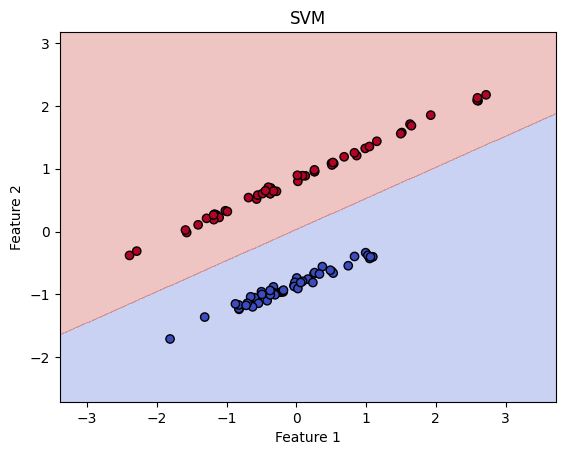

In [15]:
X, y = make_classification(
    n_samples=100,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_clusters_per_class=1,
    class_sep=1.2,
    random_state=42
)

# Standardize the dataset
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
svm = SVC(kernel='linear', degree=3, C=1.0, gamma='scale', random_state=42)
svm.fit(X_train, y_train)

def plot_decision_boundary(X, y, model):
    # Create a mesh grid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

    # Predict on the mesh grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=plt.cm.coolwarm)
    plt.title('SVM')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

# Call the function to plot
plot_decision_boundary(X, y, svm)

### 8.Write a Python program to train a Bernoulli Naïve Bayes classifier for binary classification on a dataset with binary features

In [16]:
from sklearn.naive_bayes import BernoulliNB
np.random.seed(42)
X = np.random.randint(2, size=(1000, 10))  # 1000 samples, 10 binary features
y = np.random.randint(2, size=(1000,))     # Binary target variable (0 or 1)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Bernoulli Naïve Bayes classifier
classifier = BernoulliNB()
classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = classifier.predict(X_test)

# Evaluate the classifier
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Accuracy:", accuracy_score(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.44      0.53       152
           1       0.57      0.76      0.65       148

    accuracy                           0.60       300
   macro avg       0.61      0.60      0.59       300
weighted avg       0.61      0.60      0.59       300

Accuracy: 0.6


### 9.Write a Python program to apply feature scaling before training an SVM model and compare results with unscaled data

In [17]:
X, y = make_classification(
    n_samples=100,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_clusters_per_class=1,
    class_sep=1.2,
    random_state=42
)

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = SVC(kernel = "linear")
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)

from sklearn.metrics import accuracy_score,classification_report
print("Without Scaled")
print("Classification_report :")
print(classification_report(y_test,y_pred))
print("accuracy_score:")
print(accuracy_score(y_test,y_pred))


Without Scaled
Classification_report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00         7

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20

accuracy_score:
1.0


In [18]:
# Standardize the dataset
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

clf = SVC(kernel = "linear")
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)

print("With Scaled")
print("Classification_report :")
print(classification_report(y_test,y_pred))
print("accuracy_score:")
print(accuracy_score(y_test,y_pred))

With Scaled
Classification_report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00         7

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20

accuracy_score:
1.0


### 10. Write a Python program to train a Gaussian Naïve Bayes model and compare the predictions before and after Laplace Smoothing

In [19]:
model_no_smoothing = GaussianNB(var_smoothing=0)  # var_smoothing=0 disables default smoothing
model_no_smoothing.fit(x_train, y_train)
y_pred_no_smoothing = model_no_smoothing.predict(x_test)
print("y_pred_no_smoothing")
print("Classification_report :")
print(classification_report(y_test,y_pred_no_smoothing))
print("accuracy_score:")
print(accuracy_score(y_test,y_pred_no_smoothing))

# Train a Gaussian Naïve Bayes model with Laplace smoothing
model_with_smoothing = GaussianNB(var_smoothing=1e-9)  # var_smoothing applies Laplace smoothing
model_with_smoothing.fit(x_train, y_train)
y_pred_with_smoothing = model_with_smoothing.predict(x_test)
print()
print()
print()
print("y_pred_smoothing")
print("Classification_report :")
print(classification_report(y_test,y_pred_with_smoothing))
print("accuracy_score:")
print(accuracy_score(y_test,y_pred_with_smoothing))

y_pred_no_smoothing
Classification_report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00         7

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20

accuracy_score:
1.0



y_pred_smoothing
Classification_report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00         7

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20

accuracy_score:
1.0


### 11. Write a Python program to train an SVM Classifier and use GridSearchCV to tune the hyperparameters (C,gamma, kernel)

In [20]:
param = {
    "C":[1,2,3,4,5],
    "kernel":["rbf","poly","sigmoid"],
    "gamma":[0.1,0.2,0.3,1]
}
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(SVC(),param_grid = param,verbose = 4,cv = 5)
grid.fit(x_train,y_train)
y_pred = grid.predict(x_test)

print("Classification_report :")
print(classification_report(y_test,y_pred))
print("accuracy_score:")
print(accuracy_score(y_test,y_pred))


Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV 1/5] END ........C=1, gamma=0.1, kernel=rbf;, score=1.000 total time=   0.0s
[CV 2/5] END ........C=1, gamma=0.1, kernel=rbf;, score=1.000 total time=   0.0s
[CV 3/5] END ........C=1, gamma=0.1, kernel=rbf;, score=1.000 total time=   0.0s
[CV 4/5] END ........C=1, gamma=0.1, kernel=rbf;, score=1.000 total time=   0.0s
[CV 5/5] END ........C=1, gamma=0.1, kernel=rbf;, score=1.000 total time=   0.0s
[CV 1/5] END .......C=1, gamma=0.1, kernel=poly;, score=1.000 total time=   0.0s
[CV 2/5] END .......C=1, gamma=0.1, kernel=poly;, score=0.688 total time=   0.0s
[CV 3/5] END .......C=1, gamma=0.1, kernel=poly;, score=1.000 total time=   0.0s
[CV 4/5] END .......C=1, gamma=0.1, kernel=poly;, score=0.500 total time=   0.0s
[CV 5/5] END .......C=1, gamma=0.1, kernel=poly;, score=0.500 total time=   0.0s
[CV 1/5] END ....C=1, gamma=0.1, kernel=sigmoid;, score=1.000 total time=   0.0s
[CV 2/5] END ....C=1, gamma=0.1, kernel=sigmoid

### 12. Write a Python program to train an SVM Classifier on an imbalanced dataset and apply class weighting and check it improve accuracy

In [21]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Generate an imbalanced synthetic dataset
X, y = make_classification(
    n_samples=1000,
    n_features=20,
    n_informative=10,
    n_redundant=5,
    n_classes=2,
    weights=[0.9, 0.1],  # 90% of one class, 10% of the other
    random_state=42
)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train an SVM without class weighting
svm_no_weights = SVC(kernel='linear', class_weight=None, random_state=42)
svm_no_weights.fit(X_train, y_train)
y_pred_no_weights = svm_no_weights.predict(X_test)

# Train an SVM with class weighting
svm_with_weights = SVC(kernel='linear', class_weight='balanced', random_state=42)
svm_with_weights.fit(X_train, y_train)
y_pred_with_weights = svm_with_weights.predict(X_test)

# Evaluate both models
print("=== Without Class Weighting ===")
print("Classification Report:")
print(classification_report(y_test, y_pred_no_weights))
print("Accuracy:", accuracy_score(y_test, y_pred_no_weights))

print("\n=== With Class Weighting ===")
print("Classification Report:")
print(classification_report(y_test, y_pred_with_weights))
print("Accuracy:", accuracy_score(y_test, y_pred_with_weights))


=== Without Class Weighting ===
Classification Report:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95       267
           1       0.88      0.21      0.34        33

    accuracy                           0.91       300
   macro avg       0.89      0.60      0.65       300
weighted avg       0.91      0.91      0.88       300

Accuracy: 0.91

=== With Class Weighting ===
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.78      0.87       267
           1       0.32      0.82      0.46        33

    accuracy                           0.79       300
   macro avg       0.64      0.80      0.66       300
weighted avg       0.90      0.79      0.82       300

Accuracy: 0.7866666666666666


### 13.  Write a Python program to implement a Naïve Bayes classifier for spam detection using email data

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd

# Sample email data (you can replace this with a larger email dataset)
data = {
    "email": [
        "Win a free iPhone now! Click here to claim your prize.",
        "Hi, can we schedule a meeting for tomorrow?",
        "Congratulations, you've won a $1,000 gift card!",
        "Don't forget to submit your project by Friday.",
        "Limited-time offer: Buy one, get one free!",
        "Hello, just wanted to check on the status of my request.",
        "Claim your free vacation today!",
        "Can you send me the files we discussed last week?",
        "Special discount for our loyal customers! Click now.",
        "Let's catch up soon over coffee.",
    ],
    "label": ["spam", "ham", "spam", "ham", "spam", "ham", "spam", "ham", "spam", "ham"],
}

# Load the data into a DataFrame
df = pd.DataFrame(data)

# Split the dataset into features and labels
X = df["email"]
y = df["label"]

# Split into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Convert text data into a bag-of-words representation
vectorizer = CountVectorizer(stop_words="english")
X_train_counts = vectorizer.fit_transform(X_train)
X_test_counts = vectorizer.transform(X_test)

# Transform counts to TF-IDF representation
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_test_tfidf = tfidf_transformer.transform(X_test_counts)

# Train a Multinomial Naïve Bayes classifier
classifier = MultinomialNB()
classifier.fit(X_train_tfidf, y_train)

# Make predictions on the test set
y_pred = classifier.predict(X_test_tfidf)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Accuracy:", accuracy_score(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

         ham       0.00      0.00      0.00         2
        spam       0.33      1.00      0.50         1

    accuracy                           0.33         3
   macro avg       0.17      0.50      0.25         3
weighted avg       0.11      0.33      0.17         3

Accuracy: 0.3333333333333333


### 14 .  Write a Python program to train an SVM Classifier and a Naïve Bayes Classifier on the same dataset and compare their accuracy

In [23]:
X, y = make_classification(
    n_samples=1000,
    n_features=10,
    n_informative=5,
    n_redundant=5,
    n_classes=2,
    random_state=42
)

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf = SVC()
clf = SVC()
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)

print("SVC METRICS")
print("Classification_report :")
print(classification_report(y_test,y_pred))
print("accuracy_score:")
print(accuracy_score(y_test,y_pred))

gb = GaussianNB()

gb.fit(x_train,y_train)
y_pred = gb.predict(x_test)
print()
print()
print("Naive Bayes METRICS")
print("Classification_report :")
print(classification_report(y_test,y_pred))
print("accuracy_score:")
print(accuracy_score(y_test,y_pred))

SVC METRICS
Classification_report :
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       144
           1       0.94      0.94      0.94       156

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300

accuracy_score:
0.9333333333333333


Naive Bayes METRICS
Classification_report :
              precision    recall  f1-score   support

           0       0.85      0.90      0.88       144
           1       0.90      0.85      0.88       156

    accuracy                           0.88       300
   macro avg       0.88      0.88      0.88       300
weighted avg       0.88      0.88      0.88       300

accuracy_score:
0.8766666666666667


### 15.  Write a Python program to perform feature selection before training a Naïve Bayes classifier and compare results

In [24]:
X, y = make_classification(
    n_samples=1000,
    n_features=5,
    n_classes=2,
    random_state=42
)
from statsmodels.stats.outliers_influence import variance_inflation_factor
df = pd.DataFrame(X)
vif = pd.DataFrame()
vif["Features"] = df.columns
vif
vif["VIF"] = [variance_inflation_factor(df.values,i) for i in range(len(df.columns))]

In [25]:
vif

,Features,VIF
0,0,inf
1,1,inf
2,2,1.000224
3,3,inf
4,4,inf


In [26]:
df.drop(0,axis = 1,inplace = True)
vif = pd.DataFrame()
vif["Features"] = df.columns
vif
vif["VIF"] = [variance_inflation_factor(df.values,i) for i in range(len(df.columns))]

In [27]:
vif

,Features,VIF
0,1,inf
1,2,1.000224
2,3,inf
3,4,inf


In [28]:
df.drop(1,axis = 1,inplace = True)
vif = pd.DataFrame()
vif["Features"] = df.columns
vif
vif["VIF"] = [variance_inflation_factor(df.values,i) for i in range(len(df.columns))]

In [29]:
vif

,Features,VIF
0,2,1.000224
1,3,1.198167
2,4,1.197944


In [30]:
df

,2,3,4
0,-0.822420,0.401366,-0.854840
1,-1.147691,-2.101131,3.040278
2,-2.084113,-1.179659,1.613602
3,1.112688,-0.835098,-0.272205
4,-0.926698,-1.402509,2.123129
...,...,...,...
995,1.039112,0.615481,-1.056899
996,-1.239107,1.805803,-1.450448
997,-0.234408,-0.619576,-1.109856
998,-1.308820,-0.396177,-0.404278


In [31]:
x_train, x_test, y_train, y_test = train_test_split(df, y, test_size=0.3, random_state=42)

clf = SVC()
clf = SVC()
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)


print("Classification_report :")
print(classification_report(y_test,y_pred))
print("accuracy_score:")
print(accuracy_score(y_test,y_pred))

Classification_report :
              precision    recall  f1-score   support

           0       0.86      0.95      0.90       146
           1       0.94      0.86      0.90       154

    accuracy                           0.90       300
   macro avg       0.90      0.90      0.90       300
weighted avg       0.90      0.90      0.90       300

accuracy_score:
0.9


### 16. Write a Python program to train an SVM Classifier using One-vs-Rest (OvR) and One-vs-One (OvO) strategies on the Wine dataset and compare their accuracy

In [33]:
from sklearn.multiclass import OneVsRestClassifier

In [34]:

clf = OneVsRestClassifier(SVC())
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)


print("Classification_report :")
print(classification_report(y_test,y_pred))
print("accuracy_score:")
print(accuracy_score(y_test,y_pred))

Classification_report :
              precision    recall  f1-score   support

           0       0.86      0.95      0.90       146
           1       0.94      0.86      0.90       154

    accuracy                           0.90       300
   macro avg       0.90      0.90      0.90       300
weighted avg       0.90      0.90      0.90       300

accuracy_score:
0.9


In [35]:
from sklearn.multiclass import OneVsOneClassifier

In [36]:

clf = OneVsOneClassifier(SVC())
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)


print("Classification_report :")
print(classification_report(y_test,y_pred))
print("accuracy_score:")
print(accuracy_score(y_test,y_pred))

Classification_report :
              precision    recall  f1-score   support

           0       0.86      0.95      0.90       146
           1       0.94      0.86      0.90       154

    accuracy                           0.90       300
   macro avg       0.90      0.90      0.90       300
weighted avg       0.90      0.90      0.90       300

accuracy_score:
0.9


### 17. Write a Python program to train an SVM Classifier using Linear, Polynomial, and RBF kernels on the Breast Cancer dataset and compare their accuracy

In [38]:
param = {"Linear":"linear","Polynomial":"poly","RBF":"rbf"}
d = {}
for i in range(len(param)):
    clf = SVC(kernel = list(param.values())[i])
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    print(f"Classification_report :{list(param.keys())[i]}")
    print(classification_report(y_test,y_pred))
    print("accuracy_score:")
    print(accuracy_score(y_test,y_pred))
    d[list(param.keys())[i]] = accuracy_score(y_test,y_pred)

Classification_report :Linear
              precision    recall  f1-score   support

           0       0.86      0.92      0.89       146
           1       0.92      0.86      0.89       154

    accuracy                           0.89       300
   macro avg       0.89      0.89      0.89       300
weighted avg       0.89      0.89      0.89       300

accuracy_score:
0.8866666666666667
Classification_report :Polynomial
              precision    recall  f1-score   support

           0       0.78      0.95      0.85       146
           1       0.93      0.75      0.83       154

    accuracy                           0.84       300
   macro avg       0.86      0.85      0.84       300
weighted avg       0.86      0.84      0.84       300

accuracy_score:
0.8433333333333334
Classification_report :RBF
              precision    recall  f1-score   support

           0       0.86      0.95      0.90       146
           1       0.94      0.86      0.90       154

    accuracy         

In [39]:
d

{'Linear': 0.8866666666666667, 'Polynomial': 0.8433333333333334, 'RBF': 0.9}

### 18. Write a Python program to train an SVM Classifier using Stratified K-Fold Cross-Validation and compute the average accuracy

In [41]:
from sklearn.model_selection import KFold

In [42]:
cv = KFold(n_splits = 5)
from sklearn.model_selection import cross_val_score
acc = cross_val_score(SVC(),x_train,y_train,cv = cv)

In [43]:
acc

array([0.81428571, 0.86428571, 0.83571429, 0.87142857, 0.88571429])

In [44]:
np.mean(acc)

0.8542857142857143

### 19. Write a Python program to train a Naïve Bayes classifier using different prior probabilities and compare performance

In [46]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, accuracy_score

# Generate synthetic data
X, y = make_classification(
    n_samples=1000,
    n_features=10,
    n_informative=5,
    n_redundant=3,
    n_classes=2,
    random_state=42
)

# Normalize the dataset to be non-negative
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a MultinomialNB classifier
classifier = MultinomialNB()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.79      0.82       156
           1       0.79      0.84      0.81       144

    accuracy                           0.82       300
   macro avg       0.82      0.82      0.82       300
weighted avg       0.82      0.82      0.82       300

Accuracy: 0.8166666666666667


### 20. Write a Python program to perform Recursive Feature Elimination (RFE) before training an SVM Classifier and compare accuracy

In [48]:
from sklearn.feature_selection import RFE

In [49]:
from sklearn.datasets import load_iris
data = load_iris()
df = pd.DataFrame(data.data,columns = data.feature_names)
x = df
y = data.target

In [50]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [51]:
model = RFE(estimator=SVC(kernel='linear'), n_features_to_select=2)
model.fit(x_train,y_train)

RFE(estimator=SVC(kernel='linear'), n_features_to_select=2)

In [52]:
model.ranking_

array([3, 2, 1, 1])

In [53]:
model.support_

array([False, False,  True,  True])

In [54]:
y_pred = model.predict(x_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

Accuracy: 1.0


### 21. Write a Python program to train an SVM Classifier and evaluate its performance using Precision, Recall, and F1-Score instead of accuracy

In [56]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

# Compute Recall
print("Recall Score (macro):")
print(recall_score(y_test, y_pred, average='macro'))

# Compute Precision
print("Precision Score (macro):")
print(precision_score(y_test, y_pred, average='macro'))

# Compute F1 Score
print("F1 Score (macro):")
print(f1_score(y_test, y_pred, average='macro'))

# Optionally, you can try other average settings:
# average='micro', average='weighted', or average=None for per-class scores


Recall Score (macro):
1.0
Precision Score (macro):
1.0
F1 Score (macro):
1.0


### 22. Write a Python program to train a Naïve Bayes Classifier and evaluate its performance using Log Loss (Cross-Entropy Loss)

In [58]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import log_loss, accuracy_score, classification_report

# Generate synthetic dataset
X, y = make_classification(
    n_samples=1000,
    n_features=20,
    n_informative=15,
    n_redundant=5,
    n_classes=2,
    random_state=42
)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Naïve Bayes classifier
classifier = GaussianNB()
classifier.fit(X_train, y_train)

# Predict probabilities for the test set
y_pred_proba = classifier.predict_proba(X_test)

# Predict classes for the test set
y_pred = classifier.predict(X_test)

# Evaluate using Log Loss
logloss = log_loss(y_test, y_pred_proba)

# Evaluate using accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print the evaluation results
print("=== Evaluation Results ===")
print(f"Log Loss (Cross-Entropy Loss): {logloss:.4f}")
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


=== Evaluation Results ===
Log Loss (Cross-Entropy Loss): 0.4281
Accuracy: 0.8033

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.82      0.82       160
           1       0.80      0.78      0.79       140

    accuracy                           0.80       300
   macro avg       0.80      0.80      0.80       300
weighted avg       0.80      0.80      0.80       300



### 23. Write a Python program to train an SVM Classifier and visualize the Confusion Matrix using seaborn

<Axes: >

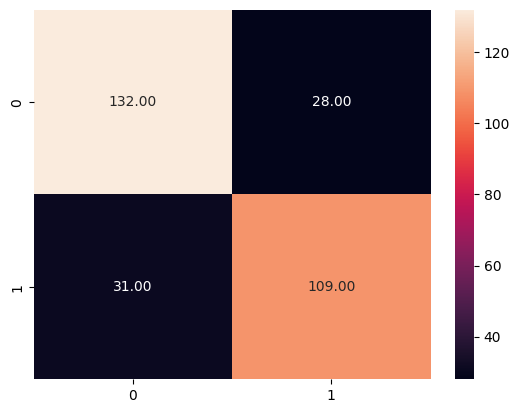

In [60]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_test,y_pred),annot = True,fmt = ".2f" )

### 24. Write a Python program to train an SVM Regressor (SVR) and evaluate its performance using Mean Absolute Error (MAE) instead of MSE

In [62]:
import numpy as np
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error

# Generate synthetic regression dataset
X, y = make_regression(
    n_samples=500,
    n_features=5,
    noise=0.2,
    random_state=42
)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train an SVM Regressor
svr_model = SVR(kernel='rbf', C=1.0, epsilon=0.1)  # Radial Basis Function (RBF) kernel
svr_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svr_model.predict(X_test)

# Evaluate the model using Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Print the MAE
print("=== Evaluation ===")
print(f"Mean Absolute Error (MAE): {mae:.4f}")

# Optional: Print the first few actual vs predicted values
print("\nFirst 5 Actual vs Predicted Values:")
for actual, predicted in zip(y_test[:5], y_pred[:5]):
    print(f"Actual: {actual:.2f}, Predicted: {predicted:.2f}")


=== Evaluation ===
Mean Absolute Error (MAE): 72.5516

First 5 Actual vs Predicted Values:
Actual: -38.57, Predicted: -6.61
Actual: 6.23, Predicted: 12.97
Actual: 6.41, Predicted: 3.15
Actual: -122.94, Predicted: -8.24
Actual: 54.51, Predicted: 9.84


### 25. Write a Python program to train a Naïve Bayes classifier and evaluate its performance using the ROC-AUC score

ROC-AUC Score: 0.8872


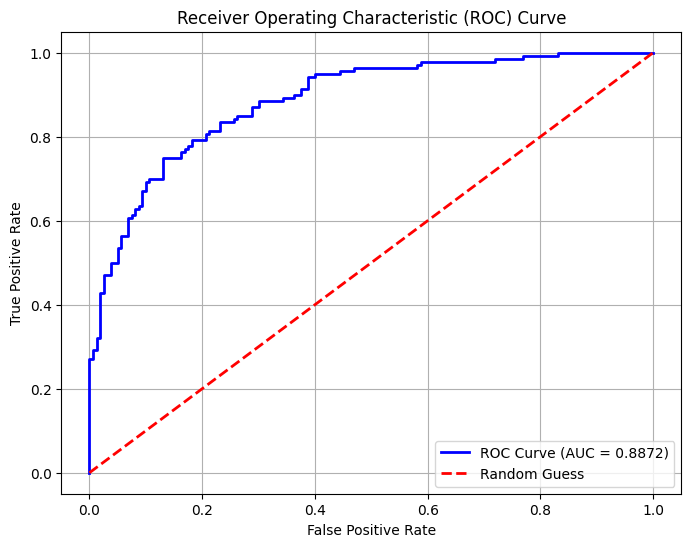

In [64]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt

# Generate synthetic binary classification dataset
X, y = make_classification(
    n_samples=1000,
    n_features=20,
    n_informative=15,
    n_redundant=5,
    n_classes=2,
    random_state=42
)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Naïve Bayes classifier
classifier = GaussianNB()
classifier.fit(X_train, y_train)

# Predict probabilities for the positive class
y_pred_proba = classifier.predict_proba(X_test)[:, 1]

# Evaluate using ROC-AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Print the ROC-AUC score
print(f"ROC-AUC Score: {roc_auc:.4f}")

# Plot the ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f"ROC Curve (AUC = {roc_auc:.4f})")
plt.plot([0, 1], [0, 1], color='red', linestyle='--', lw=2, label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.grid()
plt.show()


### 26. Write a Python program to train an SVM Classifier and visualize the Precision-Recall Curve

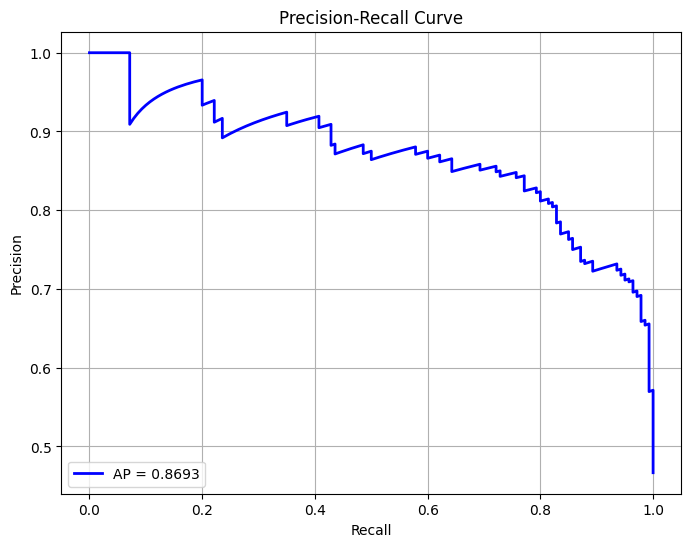

In [66]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# Generate synthetic binary classification dataset
X, y = make_classification(
    n_samples=1000,
    n_features=20,
    n_informative=15,
    n_redundant=5,
    n_classes=2,
    random_state=42
)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train an SVM classifier
svm_classifier = SVC(kernel='linear', probability=True, random_state=42)
svm_classifier.fit(X_train, y_train)

# Predict probabilities for the positive class
y_scores = svm_classifier.predict_proba(X_test)[:, 1]

# Compute Precision-Recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

# Compute Average Precision Score
average_precision = average_precision_score(y_test, y_scores)

# Plot the Precision-Recall Curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2, label=f"AP = {average_precision:.4f}")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend(loc="lower left")
plt.grid()
plt.show()
